# The Law of Large Numbers (LLN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 🎲 Rolling a dice

In [2]:
# Run this cell multiple times
np.random.randint(1, 6+1)

6

* Everytime you run this cell, you are throwing a dice and the outcome if this experiment is totally random (1, 2, 3, 4, 5 or 6), we simply call it a **`random experiment`**.
* ❓How would you roll 3 dices simultaneously. Read the [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) docs and roll these three dice. ❓

In [3]:
random_experiment = np.random.randint(1, 6 + 1)
random_experiment

4

🚀 So now, let's roll our dice `n = 20` times and compute the average outcome. Store the results in an `outcomes` variable and the average of these outcomes in an `average_outcome` variable.

In [4]:
n = 20
outcomes = np.random.randint(1, 6 + 1, size = 20)
print(outcomes)
average_outcomes = np.mean(outcomes)
print(average_outcomes)
average_outcomes

[1 4 1 4 4 3 2 5 6 1 6 3 1 6 5 6 3 1 2 3]
3.35


3.35

🤔 What average value did you expect ? Store it in a `expected_value` variable.

In [5]:
expected_value = (1 + 2 + 3 + 4 + 5 + 6) /6
expected_value

3.5

In [6]:
def rolling_dice_experiment(num_trials, num_rolls):
    averages = []
    total_sum = 0
    
    for i in range(num_trials):
        outcomes = np.random.randint(1, 6 + 1, size=num_rolls)
        average = np.mean(outcomes)
        total_sum += average
        averages.append(total_sum / (len(averages) + 1))
    
    return averages

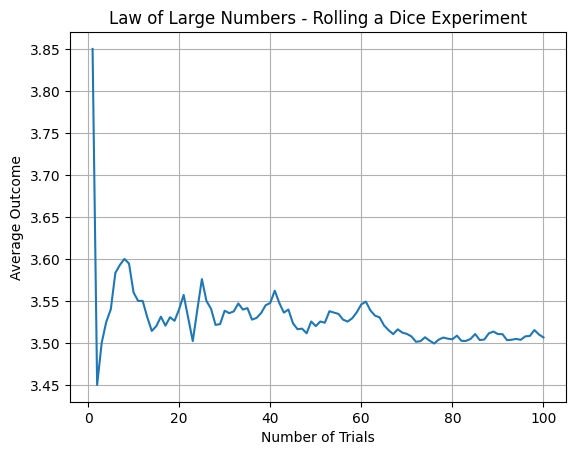

In [7]:
n = 20
t = 100

result = rolling_dice_experiment(t, n)
result
plt.plot(range(1, t + 1), result)
plt.xlabel("Number of Trials")
plt.ylabel("Average Outcome")
plt.title("Law of Large Numbers - Rolling a Dice Experiment")
plt.grid(True)
plt.show()

## 🪙 Tossing a coin 

### One time

👉 Let's run the same experiment with toss a coin instead.

* The outcomes are now 0 and 1.
* If you run the experiment 100 times, most likely you will have approximately 50 heads and 50 tails.
* Let's define "head" as a successful experiment and $p$ as the probability of having a head. Intuitively, $ p = \frac{1}{2} = 0.5 = 50 \%$

🤓 A random experiment with two possibles outcomes `success/failure`and $p$ as the `probability of success` is said to follow a **`Bernoulli distribution`** with parameter `p` $ \in [0,1] $

🔥 Let's verify the `Law of Large Numbers` for this `tossing a coin` experiment.

***Questions :***

👉 `Play with the number of trials in the cell below` and visualize the associated plot of average outcome vs. the number of trials.

In [8]:
number_of_trials = 500 # play this this number
p = 0.5 # expected value of the coin

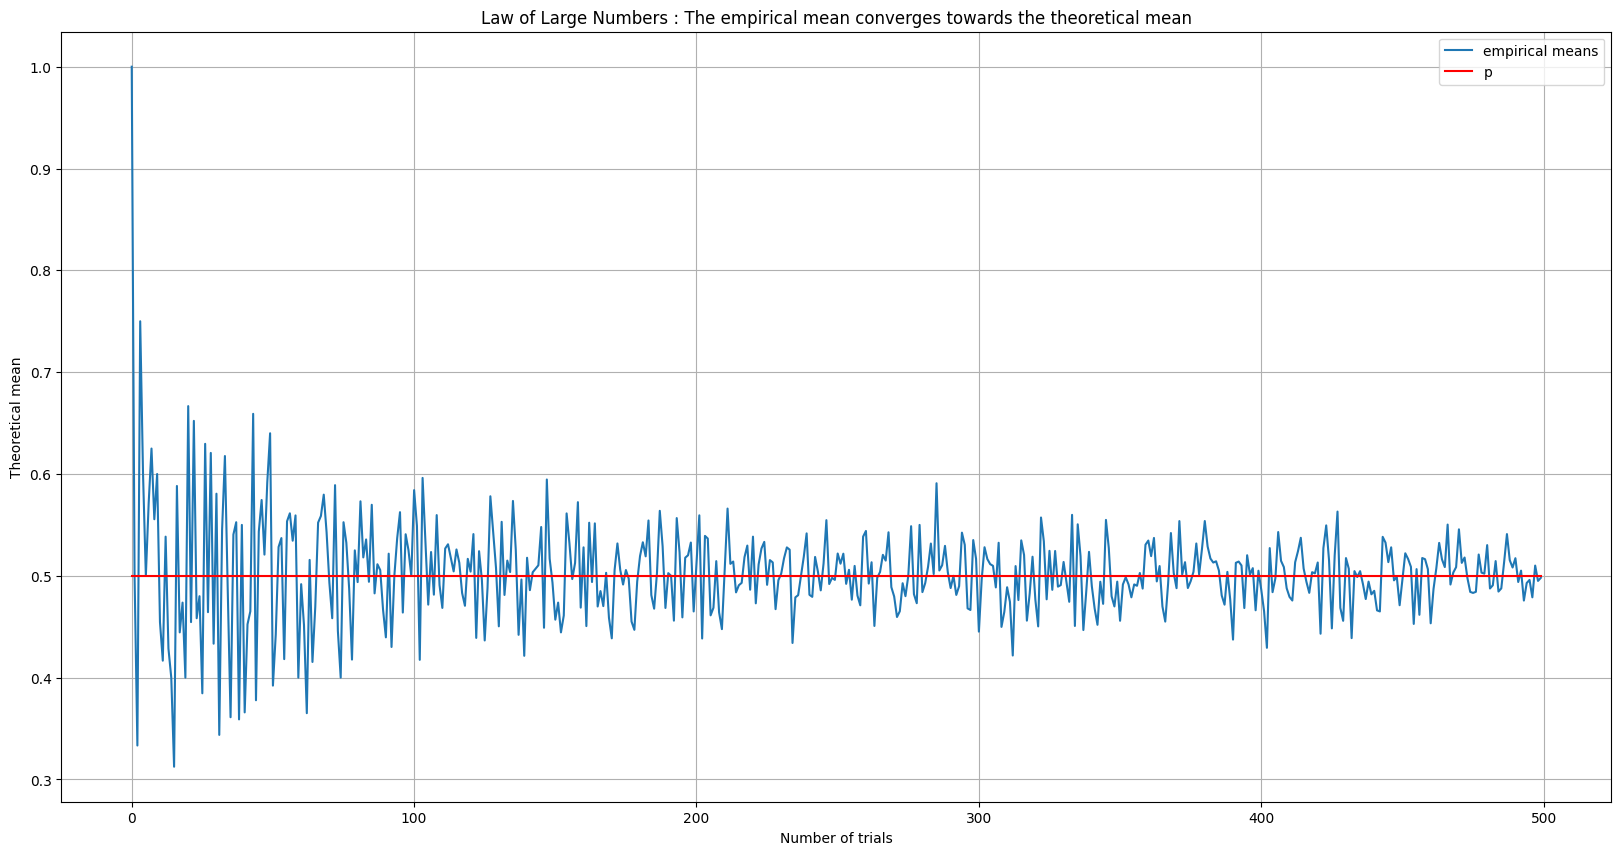

In [9]:
#############################################
#     playing with the number of trials     #
#############################################
trials = np.arange(1,number_of_trials + 1,1)
results = [np.mean(np.random.randint(0,1+1, n)) for n in trials]
    
#############################################
#            plotting the results           #
#############################################
        
plt.figure(figsize=(20,10))
plt.plot(results,label='empirical means')
plt.plot([p]*len(results),label='p', color = "red")
plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Multiple times

👉 Here, ***ONE experiment*** consists of :
* tossing a coin `n_times`
* every trial has a `probability p` of success.

👉 After running one experiment, we can count the `number of successes` between `no success` and `n_times successes`.

📚 A random experiment with:
- two possible outcomes `success/failure`
- `p` $ \in [0,1] $ as the `probability of success`
- `n` $ \in \mathbb{N} $ trials

is said to follow a **`Binomial distribution (n,p)`** distribution.

😉 If you think about it, **`a Binomial distribution (n,p) is the sum of n independent Bernoulli(p) random variables`** !

---

❓ In the following cell, use [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) to simulate **ONE Binomial Experience** in Python with:
- $p = 0.7$ (imagine that your coin is biased)
- $n = 10$ trials



In [10]:
n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

binominal_outscope = np.random.binomial(n, p)
binominal_outscope

5

❓ Now, repeat this experiment $N = 20$ times and store the N results in a list

In [11]:
# Run this cell multiple times 
# for N realisations of a Binomial Experience

N = 20  # number of experiment
n = 10  # tossing a coin n times
p = 0.7 # probability of success defined by p

result = [np.random.binomial(n, p) for i in range(N)]  
result

[6, 7, 6, 6, 7, 5, 6, 7, 9, 8, 5, 9, 7, 7, 4, 8, 9, 7, 7, 8]

🔥 Let's verify the `Law of Large Numbers` for this `tossing a coin multiple times` experiment

In [12]:
expected_value_coins = n * p
expected_value_coins

7.0

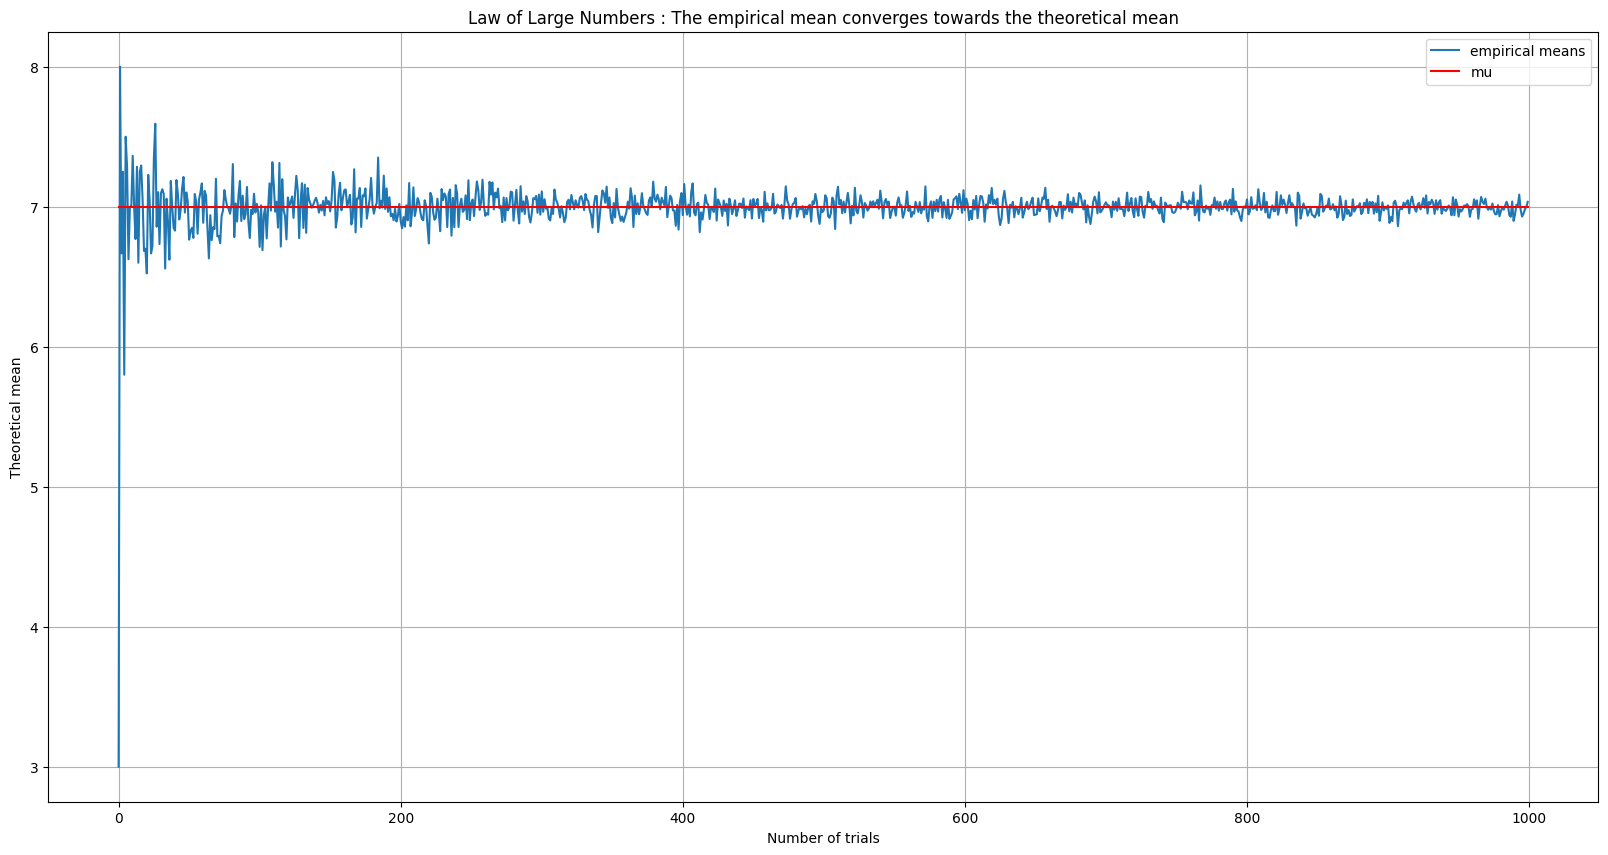

In [13]:
#############################################
#     playing with the number of trials     #
#############################################
p = 0.7
n = 10
N = 1000

trials = np.arange(1,N + 1,1)
results = [np.mean(np.random.binomial(n = n,p = p, size = N)) for N in trials]
    
#############################################
#            plotting the results           #
#############################################
    
    
plt.figure(figsize=(20,10))
plt.plot(results,label='empirical means')
plt.plot([expected_value_coins]*len(results),label='mu', color = "red")
plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')
plt.legend(loc='best')
plt.grid(True)
plt.show()